# Предсказание цены автомобиля

**Постановка задачи:**

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Необходимо построить модель для определения стоимости.

**Заказчику важны:**
- качество предсказания;
- скорость предсказания;
- время обучения.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-мультиколлинеарность" data-toc-modified-id="Проверка-на-мультиколлинеарность-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка на мультиколлинеарность</a></span></li><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Обработка-пропущенных-значений" data-toc-modified-id="Обработка-пропущенных-значений-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Обработка пропущенных значений</a></span><ul class="toc-item"><li><span><a href="#Признак-not_repaired" data-toc-modified-id="Признак-not_repaired-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Признак not_repaired</a></span></li><li><span><a href="#Признак-model" data-toc-modified-id="Признак-model-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Признак model</a></span></li><li><span><a href="#Признаки-vehicle_type,-fuel_type,-gearbox" data-toc-modified-id="Признаки-vehicle_type,-fuel_type,-gearbox-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Признаки vehicle_type, fuel_type, gearbox</a></span></li></ul></li><li><span><a href="#Признак-date_created" data-toc-modified-id="Признак-date_created-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Признак date_created</a></span></li><li><span><a href="#Признак-registration_year" data-toc-modified-id="Признак-registration_year-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Признак registration_year</a></span></li><li><span><a href="#Генерация-новых-признаков" data-toc-modified-id="Генерация-новых-признаков-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Генерация новых признаков</a></span></li><li><span><a href="#Признак-power" data-toc-modified-id="Признак-power-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Признак power</a></span></li><li><span><a href="#Признак-kilometer" data-toc-modified-id="Признак-kilometer-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Признак kilometer</a></span></li><li><span><a href="#Признак-price" data-toc-modified-id="Признак-price-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Признак price</a></span></li><li><span><a href="#Удаление-лишних-признаков" data-toc-modified-id="Удаление-лишних-признаков-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Удаление лишних признаков</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Кодирование-признаков" data-toc-modified-id="Кодирование-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Кодирование признаков</a></span></li><li><span><a href="#Разделение-данных" data-toc-modified-id="Разделение-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Разделение данных</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>RandomForest</a></span><ul class="toc-item"><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Важность признаков</a></span></li></ul></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>LightGBM</a></span><ul class="toc-item"><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Важность признаков</a></span></li></ul></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>CatBoostRegressor</a></span><ul class="toc-item"><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Важность признаков</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Загрузка и подготовка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import time

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

Настроим вывод для вещественных чисел:

In [2]:
pd.options.display.float_format = '{:,.4f}'.format

Прочитаем файл `autos.csv` из папки `datasets` и сохраним его в переменной `df`:

In [3]:
try:
    PATH = 'datasets/'
    df = pd.read_csv(os.path.join(PATH, 'autos.csv'))
    print('Прочитали файл путь:', PATH)
except:
    print('У нас проблема')

Прочитали файл путь: datasets/


Выведем на экран первые 5 строк таблицы `df`:

In [4]:
df.head().T

,0,1,2,3,4
DateCrawled,2016-03-24 11:52:17,2016-03-24 10:58:45,2016-03-14 12:52:21,2016-03-17 16:54:04,2016-03-31 17:25:20
Price,480,18300,9800,1500,3600
VehicleType,NaN,coupe,suv,small,small
RegistrationYear,1993,2011,2004,2001,2008
Gearbox,manual,manual,auto,manual,manual
Power,0,190,163,75,69
Model,golf,NaN,grand,golf,fabia
Kilometer,150000,125000,125000,150000,90000
RegistrationMonth,0,5,8,6,7
FuelType,petrol,gasoline,gasoline,petrol,gasoline


Признаки:
- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `NotRepaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя

Целевой признак:
- `Price` — цена (евро)

Получим общую информацию о таблице:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
df_len_begin = len(df)
print('Количество строк в исходном датафрейме:', df_len_begin)

Количество строк в исходном датафрейме: 354369


Итак, в таблице 16 колонок, 354_369 строк. Тип данных в столбцах: object, int64. Есть пропущенные значения

Оценим признаки с числовым типом данных: посмотрим на статистические данные, которые дают представление о распределении значений:

In [7]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,"354,369.0000","354,369.0000","354,369.0000","354,369.0000","354,369.0000","354,369.0000","354,369.0000"
mean,"4,416.6568","2,004.2344",110.0943,"128,211.1725",5.7146,0.0000,"50,508.6891"
std,"4,514.1585",90.2280,189.8504,"37,905.3415",3.7264,0.0000,"25,783.0962"
min,0.0000,"1,000.0000",0.0000,"5,000.0000",0.0000,0.0000,"1,067.0000"
25%,"1,050.0000","1,999.0000",69.0000,"125,000.0000",3.0000,0.0000,"30,165.0000"
50%,"2,700.0000","2,003.0000",105.0000,"150,000.0000",6.0000,0.0000,"49,413.0000"
75%,"6,400.0000","2,008.0000",143.0000,"150,000.0000",9.0000,0.0000,"71,083.0000"
max,"20,000.0000","9,999.0000","20,000.0000","150,000.0000",12.0000,0.0000,"99,998.0000"


Видим, что:
- в колонке `NumberOfPictures` всего лишь одно уникальное значение
- мощность автомобиля `Power` принимает как нулевые значения, так и очень большие 20_000
- цена автомобиля `Price` принимает в том числе нулевые значения
- год регистрации автомобиля `RegistrationYear` изменяется в диапазоне от 1000 до 9999

Оценим колонки с типами данных `object` и `bool`

In [8]:
df.describe(include=['object', 'bool'])

,DateCrawled,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired,DateCreated,LastSeen
count,354369,316879,334536,334664,321474,354369,283215,354369,354369
unique,271174,8,2,250,7,40,2,109,179150
top,2016-03-24 14:49:47,sedan,manual,golf,petrol,volkswagen,no,2016-04-03 00:00:00,2016-04-06 13:45:54
freq,7,91457,268251,29232,216352,77013,247161,13719,17


### Проверка на мультиколлинеарность

Построим тепловую матрицу корреляций:

In [9]:
corr = df.drop(columns=['NumberOfPictures', 'Price']).corr()
corr.style.background_gradient(cmap='coolwarm')

,RegistrationYear,Power,Kilometer,RegistrationMonth,PostalCode
RegistrationYear,1.000000,-0.000828,-0.053447,-0.011619,-0.003459
Power,-0.000828,1.000000,0.024002,0.043380,0.021665
Kilometer,-0.053447,0.024002,1.000000,0.009571,-0.007698
RegistrationMonth,-0.011619,0.043380,0.009571,1.000000,0.013995
PostalCode,-0.003459,0.021665,-0.007698,0.013995,1.000000


Матрица корреляций не выявила значительных зависимостей между обучающими признаками

### Стиль заголовков

Преобразуем имена признаков в snake_case:

In [10]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns]
df.columns.to_list()

['date_crawled',
 'price',
 'vehicle_type',
 'registration_year',
 'gearbox',
 'power',
 'model',
 'kilometer',
 'registration_month',
 'fuel_type',
 'brand',
 'not_repaired',
 'date_created',
 'number_of_pictures',
 'postal_code',
 'last_seen']

### Обработка дубликатов

Найдем и удалим дубликаты:

In [11]:
df.duplicated().sum()

4

In [12]:
df.drop_duplicates(inplace=True)

### Обработка пропущенных значений

Для подсчета количества и процента пропущенных значений напишем функцию `na_stat`

In [13]:
def na_stat(df):
    df_na_stat = (
        pd
        .concat([df.isna().sum(), df.isna().mean().map('{:.2%}'.format)], \
                axis=1, keys=['количество пропущенных значений', 'процент пропущенных значений'])
        .sort_values('количество пропущенных значений', ascending=False))
    df_na_stat = df_na_stat[df_na_stat['количество пропущенных значений'] != 0]
    return df_na_stat

In [14]:
na_stat(df)

,количество пропущенных значений,процент пропущенных значений
not_repaired,71154,20.08%
vehicle_type,37490,10.58%
fuel_type,32895,9.28%
gearbox,19833,5.60%
model,19705,5.56%


#### Признак not_repaired

Владельцы не указали был ли автомобиль в ремонте, потому что он не ремонтировался, либо просто скрыли информацию, чтобы автомобиль не казался менее привлекательным к покупке

In [15]:
df['not_repaired'].value_counts(dropna=False)

no     247158
NaN     71154
yes     36053
Name: not_repaired, dtype: int64

Заполним пропущенные значения самым популярным вариантом, так как другого обоснованного способа восстановаления данных признака нет

In [16]:
df['not_repaired'] = df['not_repaired'].fillna('no')

#### Признак model

В колонке с названием модели автомобиля чуть более 5% пропусков. Адекватный способ восстановления модели автомобиля по бренду автомобиля или по другим признакам отсутствует. Но в нашей таблице уже есть 24_420 записей с моделью `other`. Так как отсутствует обоснованный способ восстановаления данных признака, то удалим и пропущеные значения и объекты со значением признака `other`

In [17]:
df['model'].nunique()

250

In [18]:
df.query('model == "other"').shape[0]

24420

In [19]:
df.dropna(subset=['model'], inplace=True)
df = df.query('model != "other"')

#### Признаки vehicle_type, fuel_type, gearbox

Признаки имеют пропуски возможно по причине проблем с выгрузкой данных.

In [20]:
for col in ['vehicle_type', 'fuel_type', 'gearbox']:
    print(df[col].value_counts(dropna=False))
    print('_ '*15)

sedan          82699
small          72989
wagon          60713
NaN            28803
bus            23619
convertible    17887
coupe          12482
suv             8965
other           2083
Name: vehicle_type, dtype: int64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
petrol      191370
gasoline     90020
NaN          23773
lpg           4304
cng            509
hybrid         132
other          104
electric        28
Name: fuel_type, dtype: int64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
manual    238005
auto       57929
NaN        14306
Name: gearbox, dtype: int64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Заполним пропуски модами с помощью группировки по другим признакам объектов: бренду и марки автомобиля с помощью функции `fillna_with_mode` 

In [21]:
def fillna_with_mode(df, column):
    df[column] = df[column].fillna(df.groupby(['brand', 'model'])[column].transform(lambda x: x.mode()[0]))

In [22]:
fillna_with_mode(df, 'fuel_type')
fillna_with_mode(df, 'vehicle_type')
fillna_with_mode(df, 'gearbox')

Проверим наличие пропусков:

In [23]:
na_stat(df)

,количество пропущенных значений,процент пропущенных значений


### Признак date_created

Из даты создания анкеты `date_created` получим год и преобразуем в целочисленный тип:

In [24]:
df['date_created'] = df['date_created'].apply(lambda x: x[:4]).astype('int')
df['date_created'].value_counts()

2016    310216
2015        23
2014         1
Name: date_created, dtype: int64

Все анкеты созданы в 2014-2016 годах

### Признак registration_year

In [25]:
def histplot_boxplot(df, column, bins=50):
    """
    df - датафрейм
    column - название признака для построения графиков
    bins - количество корзин (50 по умолчанию)
    
    """
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.13, .87)}, figsize=(10, 8))
    sns.boxplot(data=df, 
                x=column,  
                orient='h',
                order=[1,0],
                palette='pastel',
                ax=ax_box)
    sns.histplot(data=df, 
                 x=column, 
                 bins=bins, 
                 kde=True, 
                 palette='pastel', 
                 hue_order=[1,0],
                 ax=ax_hist)
 
    ax_box.set(xlabel='')
    ax_box.set(title='Ящик с усами для "{}"'.format(column))
    ax_hist.set(title='Распределение признака "{}"'.format(column))
    plt.show()

Посмотрим на признак:

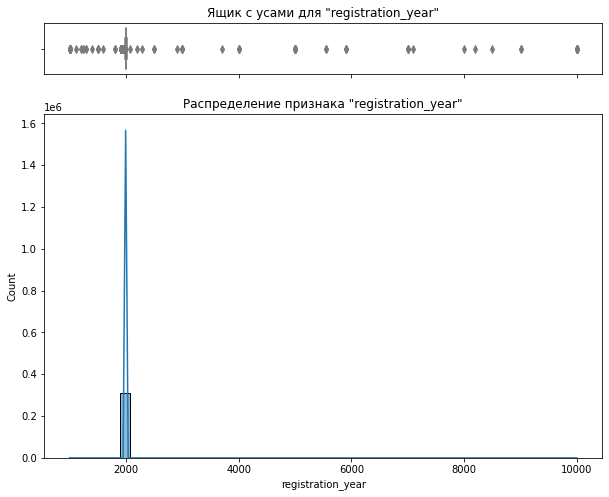

In [26]:
histplot_boxplot(df, 'registration_year')

Наш ящик с усами сжался в значении 2000 

In [27]:
registration_year_lower_limit = df['registration_year'].quantile(0.02)
print(registration_year_lower_limit)

1990.0


Избавимся от аномальных значений: пожертвуем 2 процентами данных в нижних значениях признака. Оставим автомобили не старше 1990 года, у которых год создания анкеты не превышает год регистрации автомобиля:

In [28]:
df = df.query('date_created >= registration_year and registration_year >= @registration_year_lower_limit')

Посмотрим на очищенные от аномальных значений данные

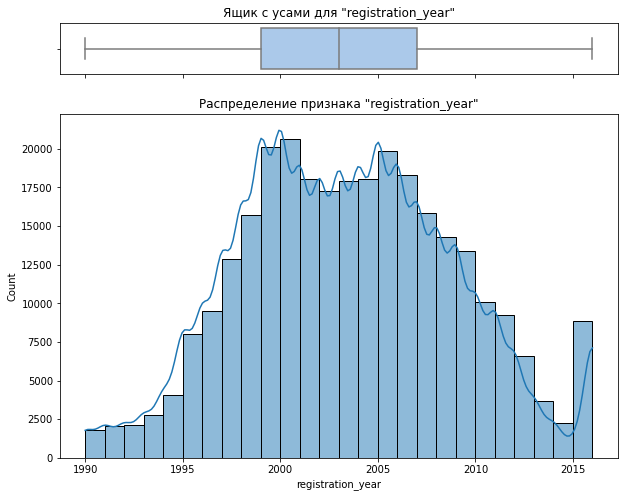

In [29]:
histplot_boxplot(df, 'registration_year', bins=26)

### Генерация новых признаков

Сгенерируем новый признак `возраст автомобиля на момент продажи` как дельта между годом создания анкеты и годом регистрации автомобиля

In [30]:
df['car_age'] = df['date_created'] - df['registration_year']

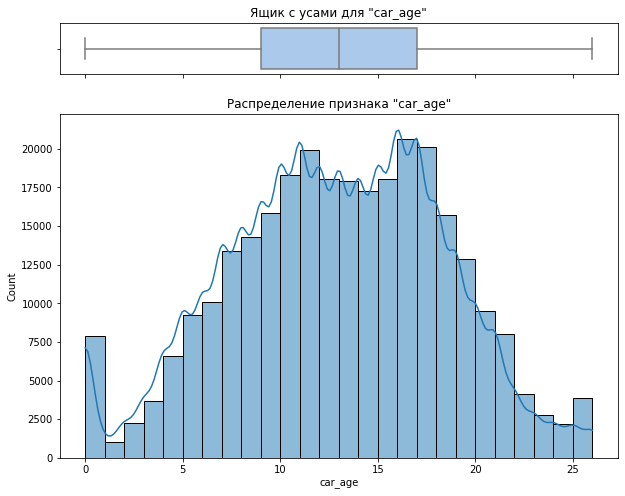

In [31]:
histplot_boxplot(df, 'car_age', bins=26)

### Признак power

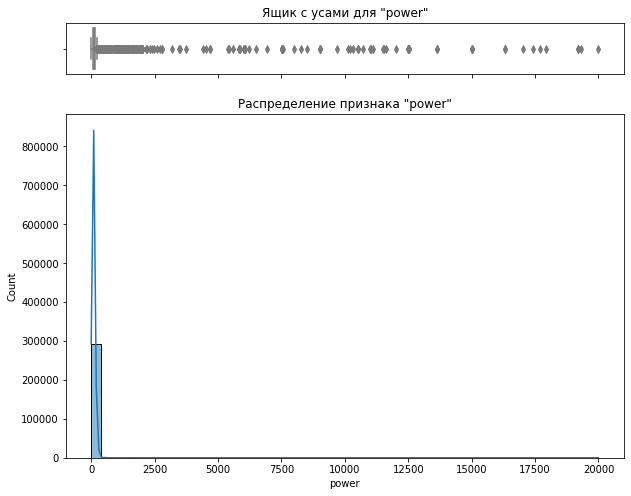

In [32]:
histplot_boxplot(df, 'power')

В значениях есть аномалии. Избавимся от аномальных значений: пожертвуем одним 0.1% данных в верхних значениях признака:

In [33]:
power_upper_limit = df['power'].quantile(0.999)
print(power_upper_limit)

545.2660000004107


In [34]:
df = df.query('power <= @power_upper_limit')

In [35]:
df.query('power == 0').shape

(26930, 17)

Нулевые значения в признаке сначала заменим пропущенными значениями, а затем заполним средними значениями по группам признаков `brand`, `model`, `fuel_type` с помощью функции `fill_zero_with_mean` 

In [36]:
def fill_zero_with_mean(df, column):
    df[column] = df[column].replace(0, np.nan)
    df[column] = df[column].fillna(df.groupby(['brand', 'model', 'fuel_type'])[column].transform('mean'))

In [37]:
fill_zero_with_mean(df, 'power')

Посмотрим на очищенные от аномальных значений данные

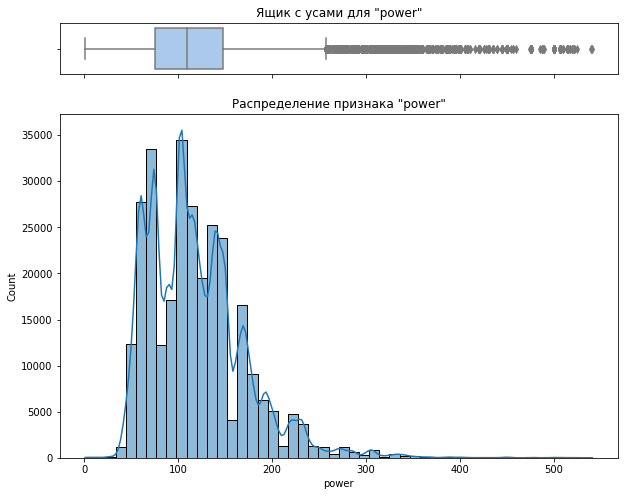

In [38]:
histplot_boxplot(df, 'power')

In [39]:
na_stat(df)

,количество пропущенных значений,процент пропущенных значений
power,30,0.01%


Удалим незаполнные пропуски:

In [40]:
df.dropna(inplace=True)

### Признак kilometer

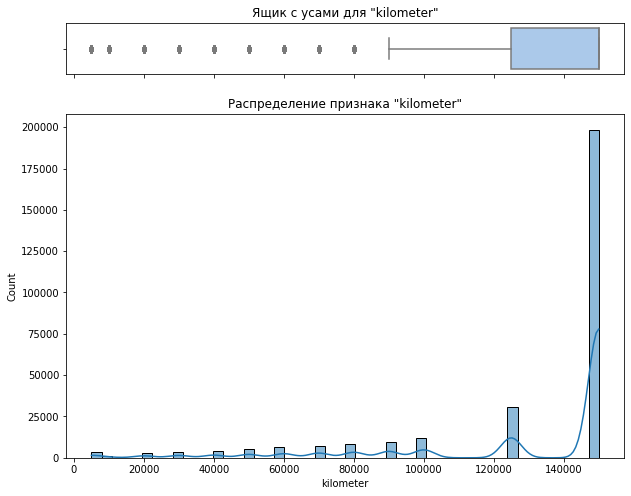

In [41]:
histplot_boxplot(df, 'kilometer')

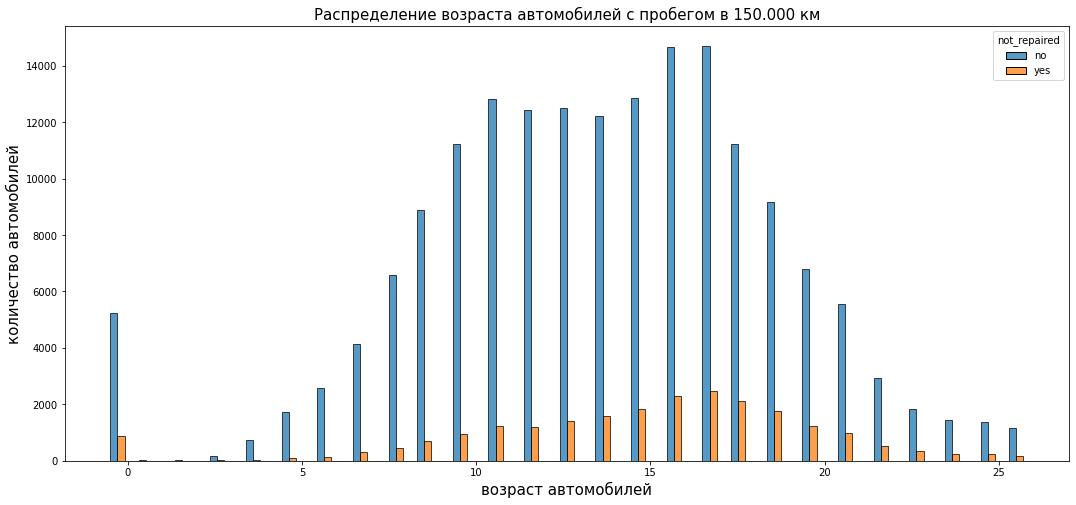

In [42]:
plt.figure(figsize=(18,8))
ax = sns.histplot(data=df[df['kilometer'] == 150_000], x='car_age', hue='not_repaired', multiple='dodge', shrink=2)
ax.set_title('Распределение возраста автомобилей c пробегом в 150.000 км', fontsize=15)
ax.set_ylabel('количество автомобилей', fontsize=15)
ax.set_xlabel('возраст автомобилей', fontsize=15)
plt.show()

Количество автомобилей с пробегом в 150.000 км с возрастом автомобиля = 0:

In [43]:
df[(df['kilometer'] == 150_000) & ((df['car_age'] == 0))]['model'].count()

6111

In [44]:
df[(df['kilometer'] == 150_000) & ((df['car_age'] == 0))].groupby(['brand', 'model'])['model'].count()

brand       model   
alfa_romeo  145          1
            147         19
            156         12
            159          2
audi        100          5
                        ..
volvo       c_reihe      2
            v40         19
            v50          4
            v70          1
            xc_reihe     2
Name: model, Length: 190, dtype: int64

Видим явное ограничение по пробегу на сервисе по продаже автомобилей в 150_000 км. 

Видим 6111 автомобилей с пробегом в 150.000 км с возрастом = 0: может быть, это такси

### Признак price

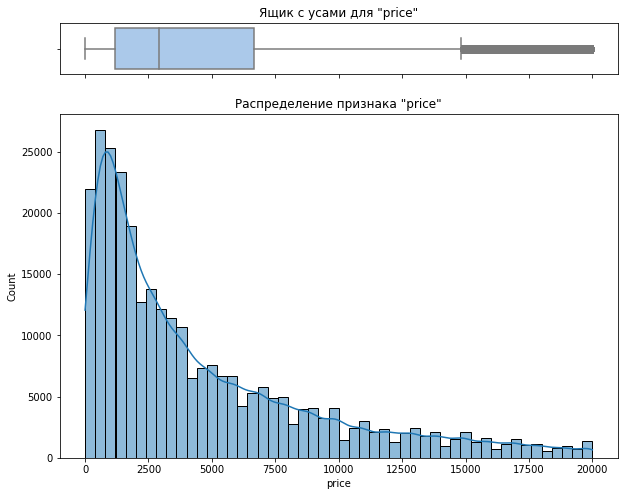

In [45]:
histplot_boxplot(df, 'price')

Посмотрим на подозрительно дешевые автомобили дешевле 100 евро

In [46]:
df[df['price'] < 100]['not_repaired'].value_counts()

no     6754
yes    1925
Name: not_repaired, dtype: int64

In [47]:
df[df['price'] == 0]['not_repaired'].value_counts()

no     5496
yes    1490
Name: not_repaired, dtype: int64

In [48]:
(
    df[(df['price'] < 100) & (df['car_age'] <= 5) & (df['not_repaired'] == 'no')]
    .groupby(['brand', 'model'])['model'].count()
)

brand       model      
alfa_romeo  147             2
            spider          1
audi        80              1
            a1              3
            a3             17
                           ..
volkswagen  tiguan          5
            touran          7
            transporter    11
            up              2
volvo       xc_reihe        1
Name: model, Length: 129, dtype: int64

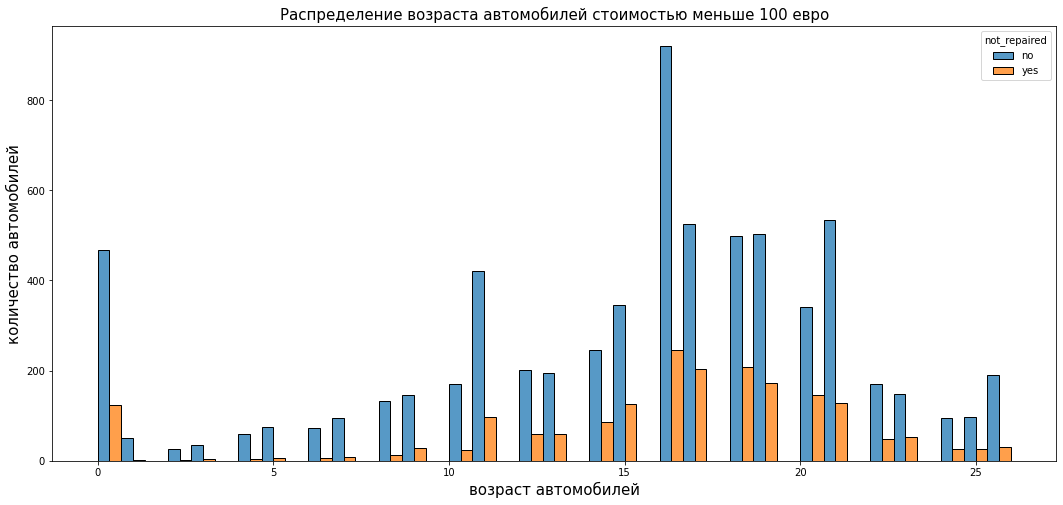

In [49]:
plt.figure(figsize=(18,8))
ax = sns.histplot(data=df[df['price'] < 100], x="car_age", hue="not_repaired",multiple="dodge", shrink=1)
ax.set_title('Распределение возраста автомобилей стоимостью меньше 100 евро', fontsize=15)
ax.set_ylabel('количество автомобилей', fontsize=15)
ax.set_xlabel('возраст автомобилей', fontsize=15)
plt.show()

- до 100 евро в основном продаются автомобили c ремонтом
- большое количество автомобилей с нулевой стоимостью. Возможно владельцы авто хотят избавиться от старого ненужного авто, но возможно, что это ошибка заполнения данных. В связи с тем, что невозможно установить истину относительно таких значений, то автомобили с 0-й ценой лучше исключить из датасета.
- избавимся от автомобилей дешевле 100 евро

In [50]:
df = df.drop(df[(df['price'] < 100)].index)

In [51]:
print('Процент удаленных строк в данных: {:.2%}'.format((df_len_begin - len(df)) / len(df)))

Процент удаленных строк в данных: 24.55%


### Удаление лишних признаков

Признаки, которые не влияют не цену автомобиля:

In [52]:
columns_to_drop = ['date_created', 'registration_year', 'registration_month',\
                   'date_crawled', 'number_of_pictures', 'postal_code', 'last_seen']
df.drop(columns=columns_to_drop, inplace=True)

**Вывод:**
- провели проверку признаков на мультиколлинеарность
- обнаружили и удалили дубликаты
- обработали пропущенные значения
- обработали аномалии
- создали новый признак "возраст автомобиля на момент продажи"
- удалили признаки, не влияющие на цену автомобиля

## Обучение моделей

### Кодирование признаков

Проведем кодирование категориальных признаков. В дальнейшем будем использовать различные модели, в зависимости от модели необходимо применять различные типы кодирования.

Для моделей градиентного бустинга преобразуем категориальные признаки в категориальный тип данных. Опытным путем данное преобразование уменьшило скорость обучения моделей

In [53]:
# df_cat - для бустингов
df_cat = df.copy()
categorical_features = [column for column in df_cat.columns if df_cat[column].dtypes == 'object']
print(categorical_features)
for col in categorical_features:
    df_cat[col] = df_cat[col].astype('category')

['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']


Для случайного леса закодируем категориальные признаки с помощью `OrdinalEncoder`, который просто перенумеровывает значения признака натуральными числами 

In [54]:
# df_ord - для случайного леса
df_ord = df.copy()
ord_enc = OrdinalEncoder()
df_ord[categorical_features] = ord_enc.fit_transform(df_ord[categorical_features])

Для линейных моделей использовать быстрое кодирование `One Hot Encoding` с помощью `get_dummies`:

`drop_first = True` используется, чтобы избежать ловушки переменных, которая также называется мультиколлинеарностью, когда одна переменная предсказывает значение других

In [55]:
# df_ohe - для линейных моделей
df_ohe = pd.get_dummies(data=df, drop_first=True)

### Разделение данных

Зафиксируем параметр псевдослучайности для наших моделей и выборок:

In [56]:
rnd_st = 12345

Разделим исходные данные на обучающую `train` и тестовую выборки `test` в пропорциях 4:1 с помощью функции `train_test_split_func`

In [57]:
def train_test_split_func(df):
    y = df['price']
    X = df.drop('price', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rnd_st)
    return X_train, X_test, y_train, y_test

In [58]:
# для случайного леса
X_train_ord, X_test_ord, y_train_ord, y_test_ord = train_test_split_func(df_ord)
print(X_train_ord.shape, X_test_ord.shape)
print(y_train_ord.shape, y_test_ord.shape)

(227619, 9) (56905, 9)
(227619,) (56905,)


In [59]:
# для бустингов
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split_func(df_cat)
print(X_train_cat.shape, X_test_cat.shape)
print(y_train_cat.shape, y_test_cat.shape)

(227619, 9) (56905, 9)
(227619,) (56905,)


In [60]:
# для линейных моделей 
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split_func(df_ohe)
print(X_train_ohe.shape, X_test_ohe.shape)
print(y_train_ohe.shape, y_test_ohe.shape)

(227619, 301) (56905, 301)
(227619,) (56905,)


### Ridge

Напишем функцию, для вычесления метрики `rmse_func`

In [61]:
def rmse_func(y, y_pred):
    """
    y - целевой признак
    y_pred - предсказания модели
    
    """
    error = (y - y_pred) ** 2
    rmse = np.sqrt(np.mean(error))
    return rmse

Определим кастомную функцию оценки качества модели`rmse_scorer`:

In [62]:
rmse_scorer = make_scorer(rmse_func, greater_is_better=False)

Напишем функцию `grid_search_func` для проведения поиска по решетке, вывода лучших параметров модели и метрики. Функция будет возвращать лучший оценщик

In [63]:
def grid_search_func(model, parameters, features_train, target_train):
    """
    model - модель
    param_grid - параметры для поиска по решетке
    features_train - входные признаки обучающая выборка
    target_train - входные признаки тестовая выборка
    
    """
    gs = GridSearchCV(estimator=model, param_grid=parameters, 
                      scoring=rmse_scorer, cv=5, verbose=0)
    gs.fit(features_train, target_train)
    gs_best_estimator = gs.best_estimator_
    print('Best parameters:', gs.best_params_)
    print('Best RMSE = %.4f' % abs(gs.best_score_))
    return gs_best_estimator, gs

Ridge — линейная регрессия с оптимизацией MSE и $l_{2}$-регуляризацией

In [64]:
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', Ridge(random_state=rnd_st))
])

param_grid = {
    'regression__alpha': np.logspace(1, 3, 20)
} 

In [65]:
%%time
gs_ridge_best_estimator, gs_ridge = grid_search_func(ridge_pipeline, param_grid, X_train_ohe, y_train_ohe)

Best parameters: {'regression__alpha': 183.29807108324357}
Best RMSE = 2425.0859
CPU times: user 6min 47s, sys: 1min 25s, total: 8min 13s
Wall time: 2min 48s


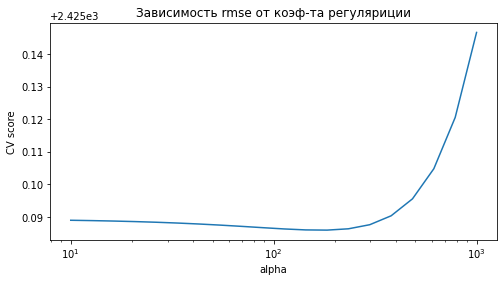

In [66]:
plt.figure(figsize=(8,4))
plt.plot(param_grid['regression__alpha'], -gs_ridge.cv_results_['mean_test_score'])
plt.xscale('log')
plt.title('Зависимость rmse от коэф-та регуляриции')
plt.xlabel('alpha')
plt.ylabel('CV score')
plt.show()

### RandomForest

Случайный лес:

In [67]:
rfr_model = RandomForestRegressor(random_state=rnd_st)
param_grid = {
#    'n_estimators': range(20, 60, 10],
    'n_estimators': [50],
#     'max_depth': [10,20,30]
    'max_depth': [30]
}

In [68]:
%%time
gs_rfr_best_estimator, _ = grid_search_func(rfr_model, param_grid, X_train_ord, y_train_ord)

Best parameters: {'max_depth': 30, 'n_estimators': 50}
Best RMSE = 1490.0922
CPU times: user 1min 19s, sys: 937 ms, total: 1min 20s
Wall time: 1min 20s


#### Важность признаков

Посмотрим какие признаки являются самыми важными для модели в деле предсказания

Визуализируем и квантифицируем показатели важности признаков, обратившись к атрибуту `feature_importances_`, который даёт нам важность признаков, оцененные моделью

In [69]:
def feature_importances_tree(model, X_train, gain=1):
    """
    model - обученная модель
    X_train - входные признаки обучающая выборка
    gain - коэффициент для масштабирования важности признаков для графика
    
    """
    feats = {}
    for feature, importance in zip(X_train.columns, gain*model.feature_importances_):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
    importances = importances.sort_values(by='Gini-Importance', ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={'index': 'Features'})
    fig, ax = plt.subplots(figsize=(6,4))
    sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='gold')
    plt.xlabel('Важность, %', fontsize=13)
    plt.ylabel('Признаки', fontsize=13)
    model_name = model.__class__.__name__
    plt.title('"Важность" признаков для модели {}'.format(model_name), fontsize=14)
    plt.show()
    display(importances)

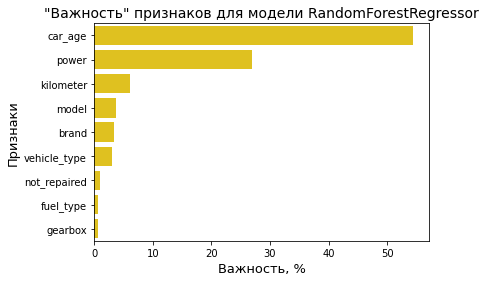

,Features,Gini-Importance
0,car_age,54.3964
1,power,26.8994
2,kilometer,6.1257
3,model,3.6819
4,brand,3.3998
5,vehicle_type,3.1327
6,not_repaired,0.9994
7,fuel_type,0.6925
8,gearbox,0.6723


In [70]:
feature_importances_tree(gs_rfr_best_estimator, X_train_ord, gain=100)

Видим, что сгенерированный признак `car_age` является самым важным для модели

### LightGBM

In [71]:
lgbm_model = LGBMRegressor(force_col_wise=True, verbose=0, seed=rnd_st)
param_grid = {
    'boosting_type' : ['gbdt'],
#    'learning_rate': range(0.10, 0.30, 0.02],
    'learning_rate': [0.16],
#    'n_estimators': range(500, 800, 100),
    'n_estimators': [700],
}

In [72]:
%%time
gs_lgbm_best_estimator, _ = grid_search_func(lgbm_model, param_grid, X_train_cat, y_train_cat)

Best parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.16, 'n_estimators': 700}
Best RMSE = 1420.8921
CPU times: user 2min 53s, sys: 1.77 s, total: 2min 55s
Wall time: 11.2 s


#### Важность признаков

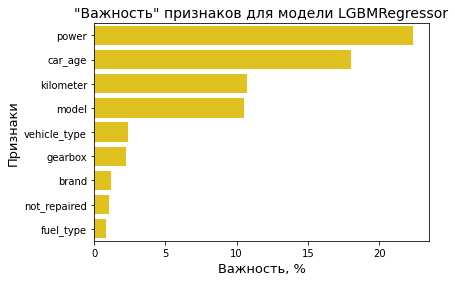

,Features,Gini-Importance
0,power,22.3641
1,car_age,17.9883
2,kilometer,10.7184
3,model,10.5138
4,vehicle_type,2.3661
5,gearbox,2.2209
6,brand,1.2111
7,not_repaired,1.0725
8,fuel_type,0.8448


In [73]:
feature_importances_tree(gs_lgbm_best_estimator, X_train_cat, gain=0.0033)

А тут сгенерированный признак `car_age` является вторым по важности для модели

### CatBoostRegressor

In [74]:
cbr_model = CatBoostRegressor(loss_function='RMSE', random_state=rnd_st, silent=True,
                              cat_features=categorical_features)
param_grid = {
    'learning_rate': [0.5], 
    'iterations': [700]
}

In [75]:
%%time
gs_cbr_best_estimator, _ = grid_search_func(cbr_model, param_grid, X_train_cat, y_train_cat)

Best parameters: {'iterations': 700, 'learning_rate': 0.5}
Best RMSE = 1466.6187
CPU times: user 19min 38s, sys: 17.4 s, total: 19min 55s
Wall time: 1min 39s


#### Важность признаков

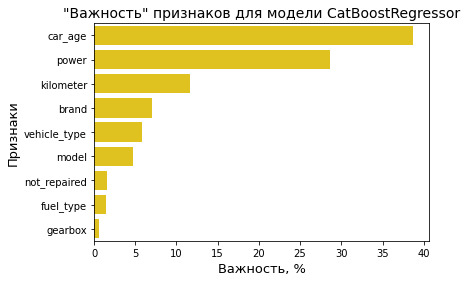

,Features,Gini-Importance
0,car_age,38.6890
1,power,28.6680
2,kilometer,11.6603
3,brand,6.9990
4,vehicle_type,5.7630
5,model,4.7071
6,not_repaired,1.5460
7,fuel_type,1.4064
8,gearbox,0.5612


In [76]:
feature_importances_tree(gs_cbr_best_estimator, X_train_cat)

И снова сгенерированный признак `car_age` является самым важным для модели

**Вывод:**
- произвели кодирование признаков
- разделили данные на обучающую и тестовую выборки
- с помощью поиска по решетке нашли лучшие значения гиперпараметров для разных моделей
- нашли важные признаки для моделей

## Анализ моделей

Таблица `results` для хранения результатов:

In [77]:
data = {'model_name': [], 'rmse': [], 'r2': [], 'learning_time': [], 'predicting_time': []}
results = pd.DataFrame(data=data)

Напишем функцию `model_result` проверки качества моделей на тестовой выборке и добавления результатов в общую таблицу результатов:

In [78]:
def model_result(comment, model, X_train, X_test, y_train, y_test, plot=False):
    """
    comment - комментарий в таблицу
    model - модель
    X_train - входные признаки обучающая выборка
    X_test - входные признаки тестовая выборка
    y_train - целевой признак обучающая выборка
    y_test - целевой признак тестовая выборка
    plot - True - визуализация ошибки прогнозирования
    
    """
    fit_time_start = time.time()
    model.fit(X_train, y_train)
    fit_time_stop = time.time()
    fit_time = fit_time_stop - fit_time_start
    predict_time_start = time.time()
    y_pred = model.predict(X_test)
    predict_time_stop = time.time()
    predict_time = predict_time_stop - predict_time_start
    rmse = rmse_func(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.loc[len(results)] = [comment, rmse, r2, fit_time, predict_time]
    results.drop_duplicates(subset=['model_name'], inplace=True)
    if plot:
        plt.figure(figsize=(16,8))
        sns.lineplot(x=y_test,y=(y_test - y_pred))
        plt.xlabel('Цена автомобиля, евро', fontsize=13)
        plt.ylabel('Ошибка предсказания, евро', fontsize=13)
        plt.grid(True, color = "grey", linewidth = "1.4")
        plt.title('Ошибка предсказания для модели {}'.format(comment), fontsize=14)
        plt.show()

Добавим в таблицу результатов константную модель

In [79]:
dummy = DummyRegressor(strategy='mean')

В словари dict1, dict2 и dict3 запишем названия моделей и комментарии для таблицы результатов, а с помощью циклов вызовем функцию `model_result` для проверки качества моделей на тестовой выборке и добавления результатов в общую таблицу результатов:

In [80]:
dict1_ohe = {
    'Ridge': gs_ridge_best_estimator
}
dict2_ord = {
    'RandomForest': gs_rfr_best_estimator
}
dict3_cat = {
    'LightGBM': gs_lgbm_best_estimator,
    'Catboost': gs_cbr_best_estimator,
    'Dummy_mean': dummy
}

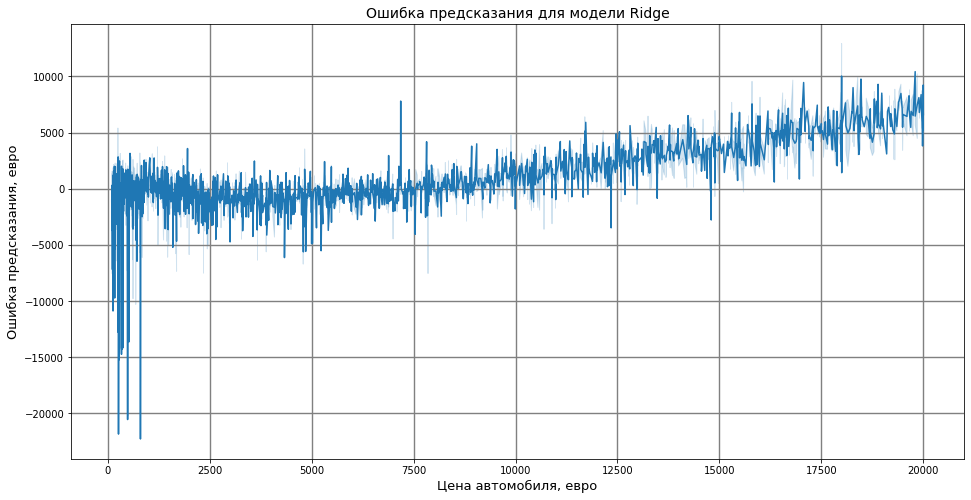

In [81]:
dict1_ohe = {
    'Ridge': gs_ridge_best_estimator
}
for comment, model in dict1_ohe.items():
    model_result(comment, model, X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe, plot=True)

In [82]:
for comment, model in dict2_ord.items():
    model_result(comment, model, X_train_ord, X_test_ord, y_train_ord, y_test_ord)

In [83]:
for comment, model in dict3_cat.items():
    model_result(comment, model, X_train_cat, X_test_cat, y_train_cat, y_test_cat)

Результаты на тестовой выборке:

In [84]:
results

,model_name,rmse,r2,learning_time,predicting_time
0,Ridge,"2,418.0709",0.7164,2.7717,0.1792
1,RandomForest,"1,469.7708",0.8952,15.2620,0.7604
2,LightGBM,"1,422.0744",0.9019,1.8473,0.2113
3,Catboost,"1,468.4706",0.8954,18.9569,0.0600
4,Dummy_mean,"4,540.9415",-0.0000,0.0003,0.0001


Посмотрим на результаты:

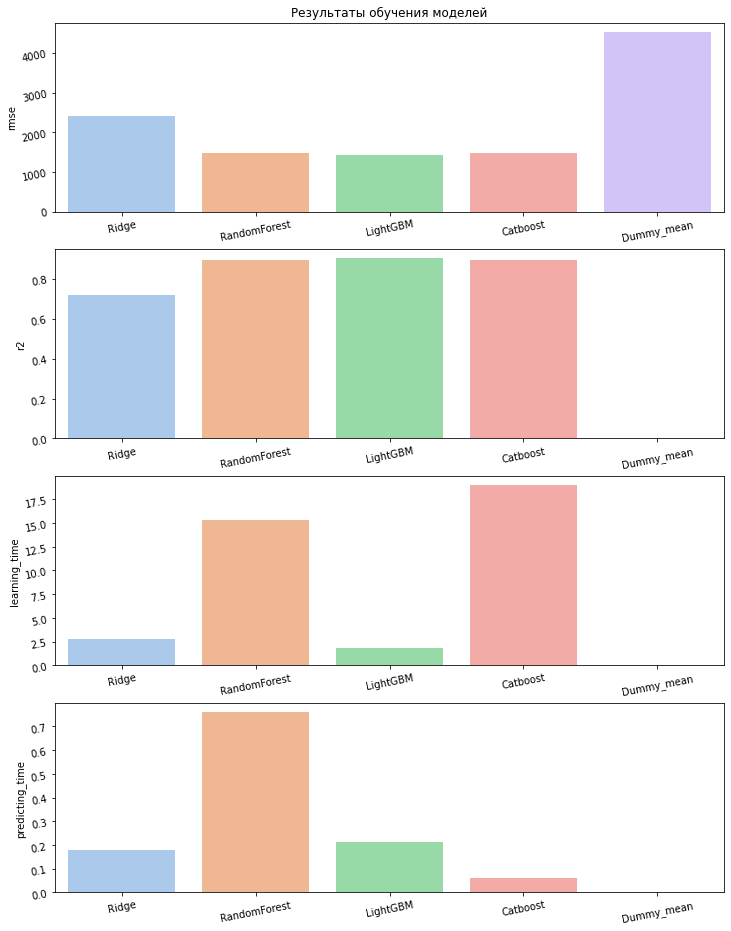

In [85]:
sns.set_palette(palette='pastel')
fig, ax = plt.subplots(4, 1, figsize=(12, 16))
sns.barplot(data=results, x='model_name', y='rmse', ax=ax[0])
ax[0].set_title('Результаты обучения моделей')
ax[0].set_xlabel('')
sns.barplot(data=results, x='model_name', y='r2', ax=ax[1])
ax[1].set_xlabel('')
sns.barplot(data=results, x='model_name', y='learning_time', ax=ax[2])
ax[2].set_xlabel('')
sns.barplot(data=results, x='model_name', y='predicting_time', ax=ax[3])
ax[3].set_xlabel('')
for ax in fig.axes:
    ax.tick_params(labelrotation=11)
plt.show()

**Вывод**:

Проведенный анализ с проверкой моделей на тестовой выборке показал, что наилучшую метрику `rmse` возможно получить с применением библиотеки `LightGBM`: rmse = 1_416. Близкое к данной метрике значение дали модели `Catboost` и `случайного леса`, но при этом они значительно дольше обучается: 3.0702 сек у `LightGBM` против 17.4493 сек у `случайного леса` и 19.3662 сек у `Catboost`. Как показала практика, модели `случайного леса` и `Catboost` можно и дальше улучшать путем увеличения количества деревьев, но при этом растет время обучения моделей.

Линейная модель дала плохой результат в предсказании, но показала самое быстрое время обучения и время предсказания

## Вывод

В ходе работы были созданы предсказательные модели, использующие различные алгоритмы обучения. В ходе обучения и предсказания, были сделаны замеры времения исполнения. Предсказания были сделаны на выделенной из исходных данных тестовой выборке. Можно сделать следующие выводы:

- линейные модели дают плохой скор, но самое лучшее время обучения и предсказания;
- Catboost и случайный лес дают высокое качество и скорость предсказания, но время обучения модели проигрывает LightGBM;
- Модель LightGBM дает самое лучшее качество, приемлимое время обучения и низкое время предсказания.

По условию задачи для заказчика важными параметрами являются качество предсказания, время обучения и скорость предсказания. Модель LightGBM является однозначным победителем среди всех других моделей

Все рассмотренные модели предсказывают в разы лучше константной модели, но средняя ошибка предсказания в 1400 евро остается весьма ощутимой. Возможно, качество предсказаний можно улучшить оптимизировав методы сбора данных, так как в исходных данных было много пропусков